In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"D:\Sameer\Sameer IMARTICUS\Machine Learning\KNN SVM Naive and PCA\winequality-red.csv")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe(percentiles=[0.01,0.02,0.04,0.05,0.25,0.5,0.75,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,5.20000,5.60000,6.00000,6.100000,7.1000,7.90000,9.200000,10.70000,11.8000,12.000000,12.400000,12.7000,13.300000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.19000,0.22960,0.26000,0.270000,0.3900,0.52000,0.640000,0.74500,0.8400,0.870000,0.900000,0.9600,1.020000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.00000,0.00000,0.00000,0.000000,0.0900,0.26000,0.420000,0.52200,0.6000,0.640000,0.660000,0.6800,0.700200,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.40000,1.40000,1.50000,1.590000,1.9000,2.20000,2.600000,3.60000,5.1000,5.600000,6.006000,6.6040,8.306000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.04298,0.04700,0.05200,0.054000,0.0700,0.07900,0.090000,0.10900,0.1261,0.153320,0.174120,0.2260,0.360160,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,3.00000,3.00000,4.00000,4.000000,7.0000,14.00000,21.000000,31.00000,35.0000,37.000000,39.000000,42.0000,50.020000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,8.00000,9.00000,11.00000,11.000000,22.0000,38.00000,62.000000,93.20000,112.1000,119.080000,127.000000,135.0000,145.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.99182,0.99258,0.99346,0.993598,0.9956,0.99675,0.997835,0.99914,1.0000,1.000122,1.000306,1.0008,1.001506,1.00369
pH,1599.0,3.311113,0.154386,2.74000,2.93000,3.00000,3.04920,3.060000,3.2100,3.31000,3.400000,3.51000,3.5700,3.580000,3.600600,3.6600,3.700200,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.42000,0.44000,0.46000,0.470000,0.5500,0.62000,0.730000,0.85000,0.9300,0.970800,1.050000,1.1300,1.260400,2.00000


In [17]:
data1=data.copy()

# Relation of quality with other variables

# Q1

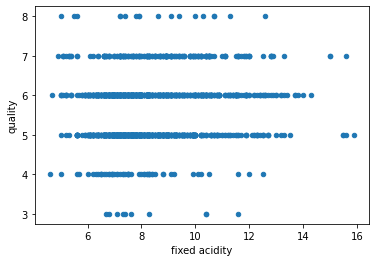

In [35]:
data.plot.scatter(x='fixed acidity', y='quality');

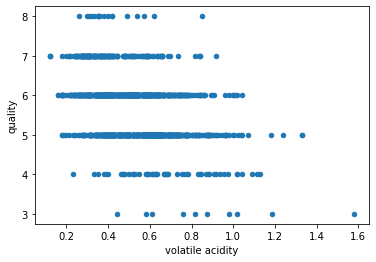

In [36]:
data.plot.scatter(x='volatile acidity', y='quality');

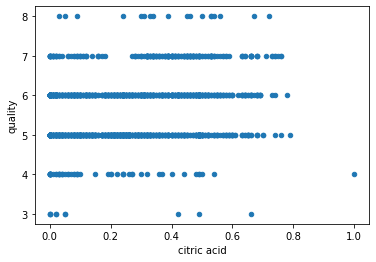

In [37]:
data.plot.scatter(x='citric acid', y='quality');

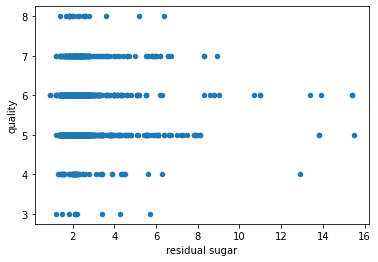

In [38]:
data.plot.scatter(x='residual sugar', y='quality');

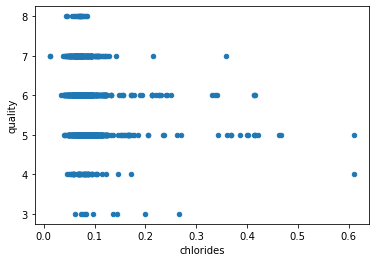

In [39]:
data.plot.scatter(x='chlorides', y='quality');

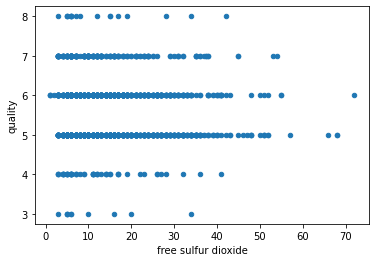

In [34]:
data.plot.scatter(x='free sulfur dioxide', y='quality');

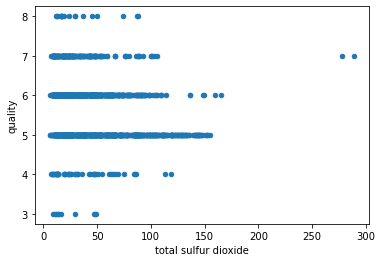

In [33]:
data.plot.scatter(x='total sulfur dioxide', y='quality');

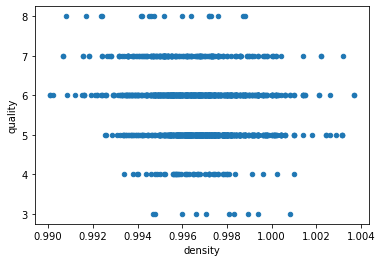

In [40]:
data.plot.scatter(x='density', y='quality');

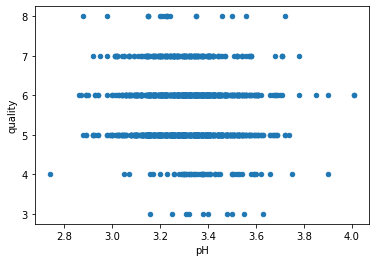

In [41]:
data.plot.scatter(x='pH', y='quality');

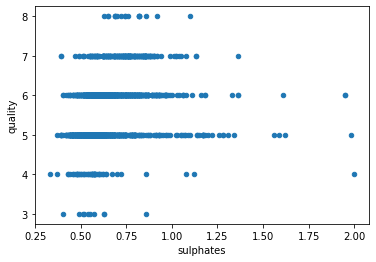

In [42]:
data.plot.scatter(x='sulphates', y='quality');

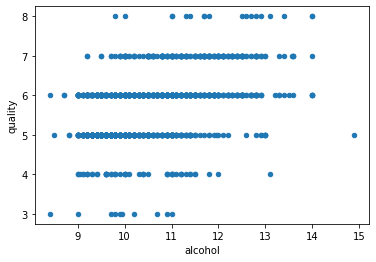

In [43]:
data.plot.scatter(x='alcohol', y='quality');

In [31]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
data1['_quality_']=np.where(data1['quality']>6,1,0)

In [21]:
_data_=data1.drop(columns=['quality'])

In [22]:
_data_

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,_quality_
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [24]:
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

In [45]:
wine_1=_data_.apply(outlier_capping)

In [49]:
wine_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,_quality_
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


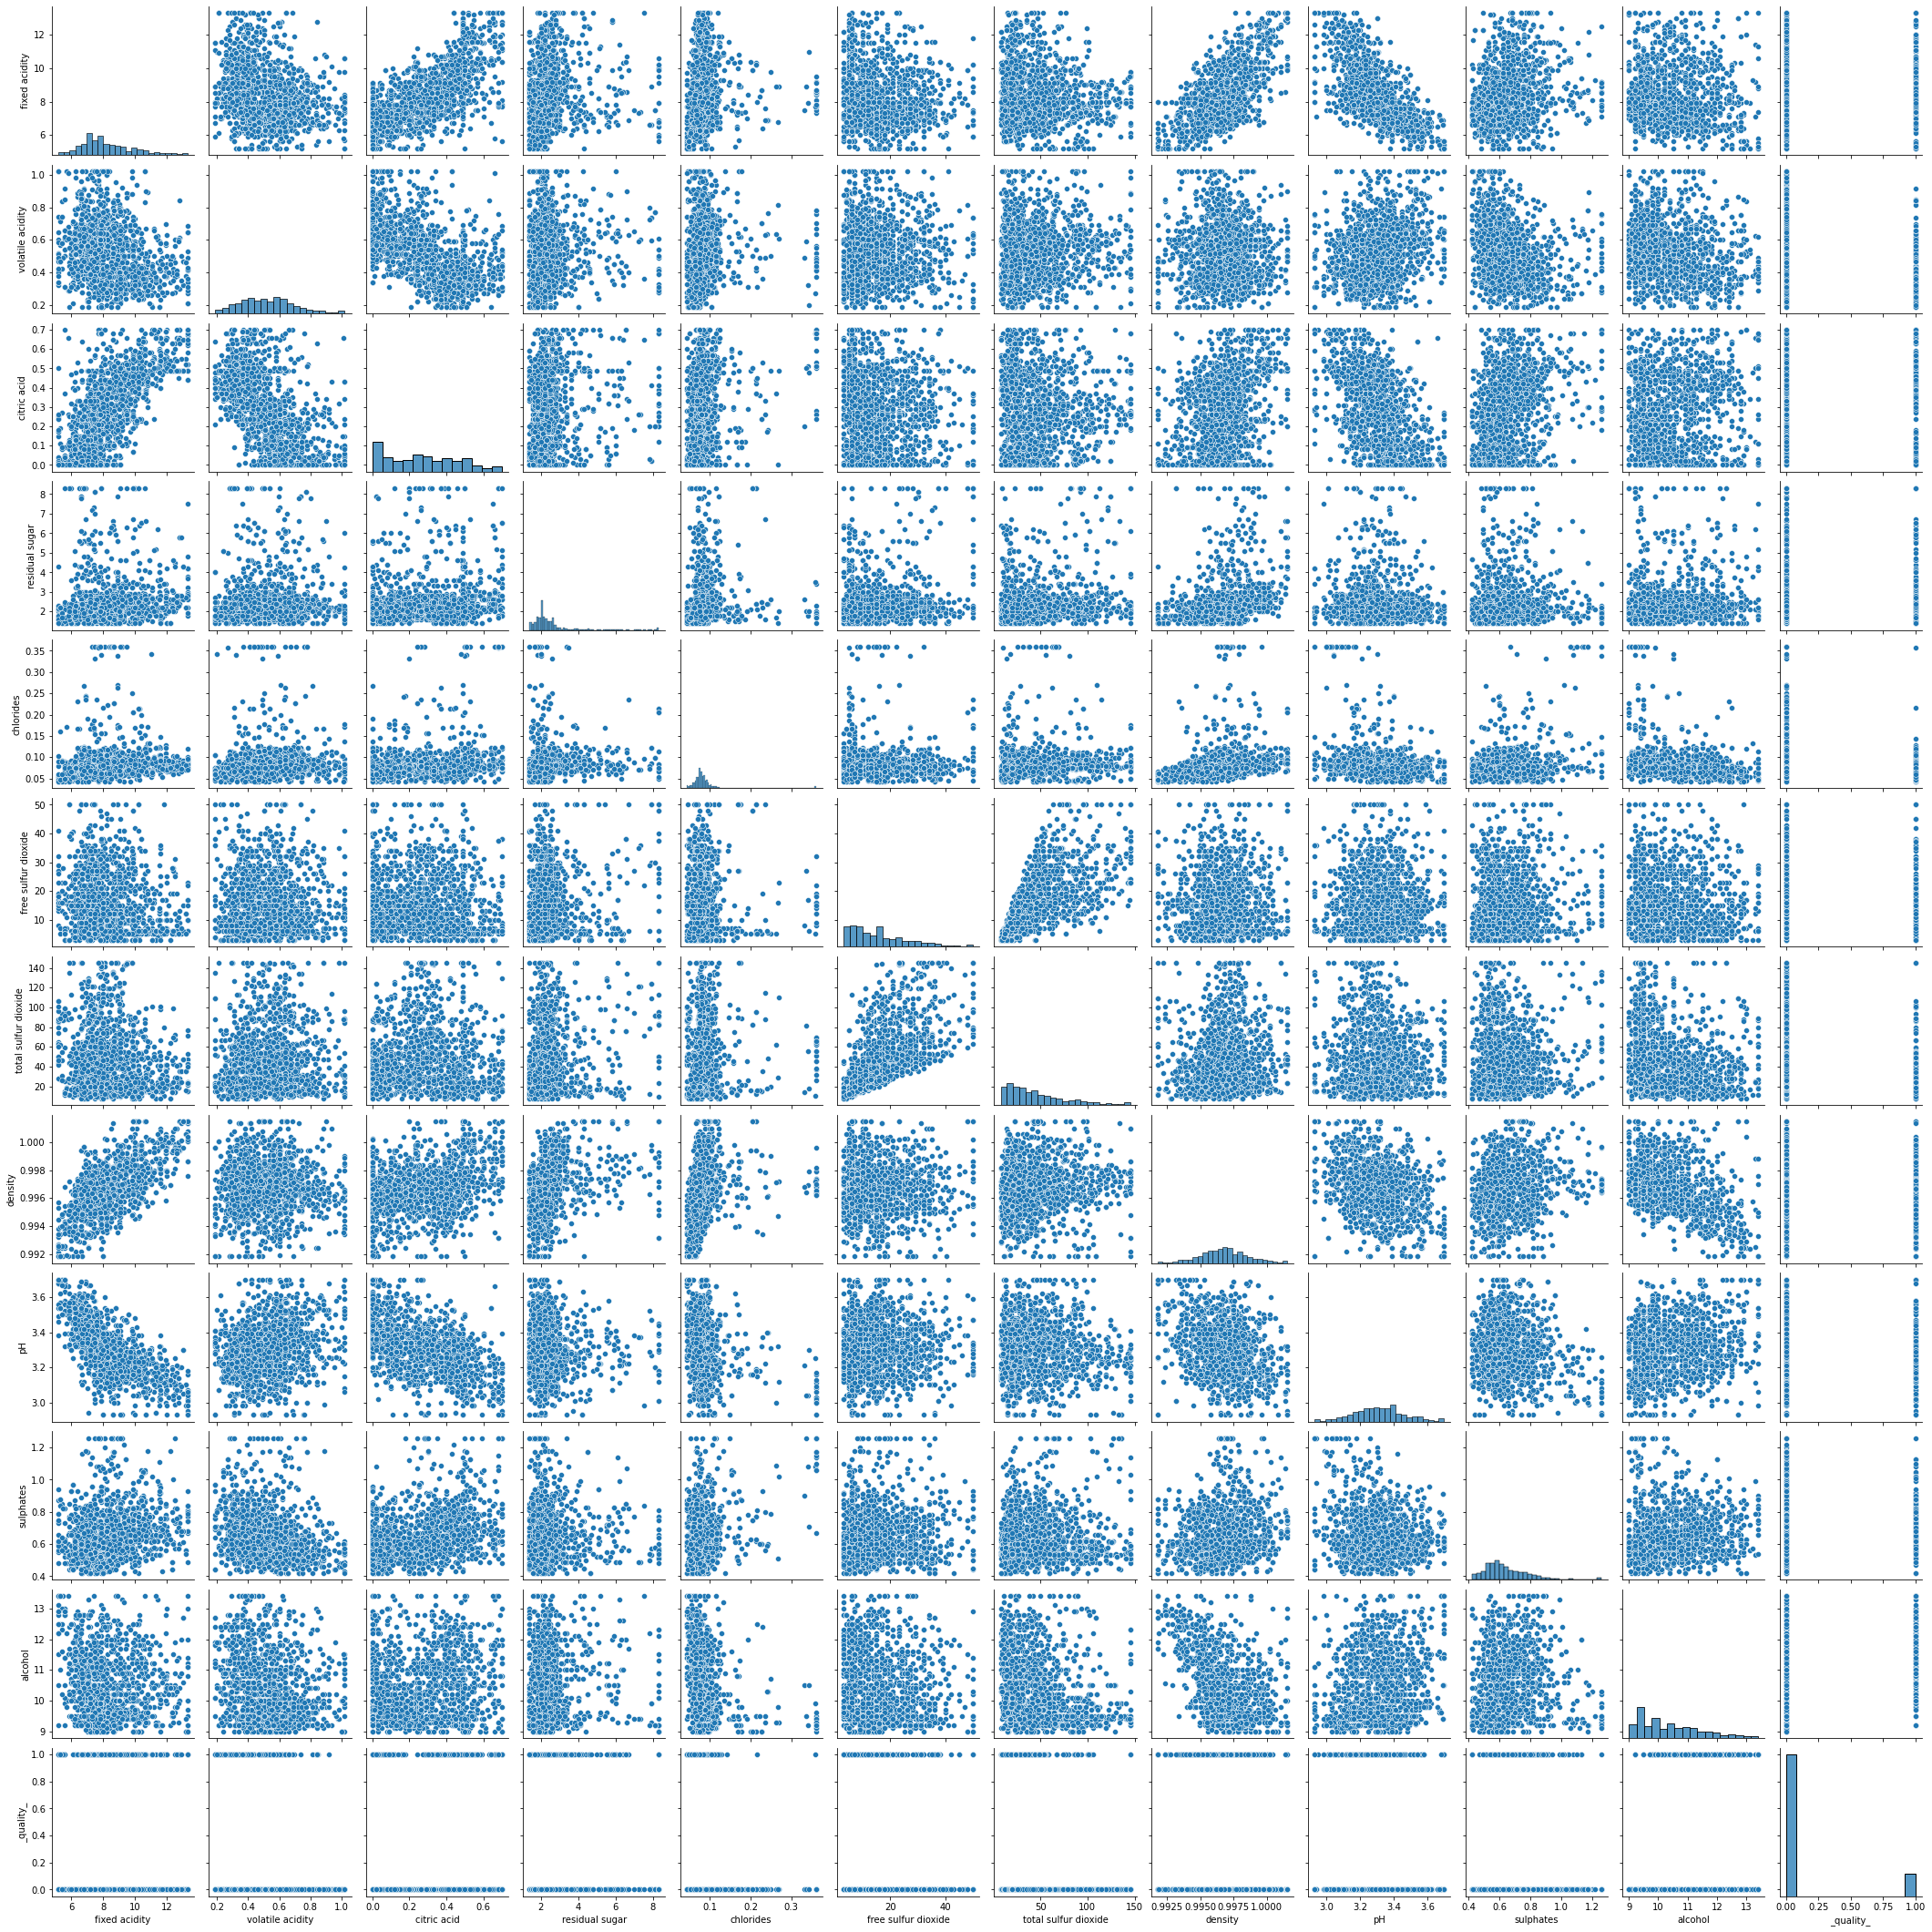

In [72]:
sns.pairplot(wine_1)

<AxesSubplot:>

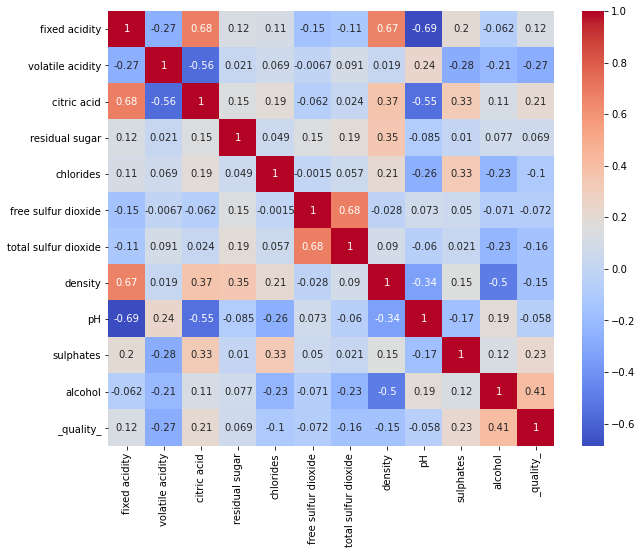

In [70]:
plt.figure(figsize=[10,8])
sns.heatmap(wine_1.corr(),annot= True,cmap='coolwarm')

In [50]:
X = wine_1.drop('_quality_',axis=1)  
y=wine_1['_quality_']

# Standardization

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
sc_x = StandardScaler()  
sc_x_fit=sc_x.fit(wine_1)
X_std = sc_x_fit.transform(wine_1)

In [75]:
X_std1=pd.DataFrame(X_std, columns=wine_1.columns)

In [76]:
X_std1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,_quality_
0,-0.536144,0.997707,-1.399529,-0.517094,-0.262734,-0.472602,-0.385081,0.578389,1.328327,-0.623649,-0.972486,-0.396256
1,-0.300494,2.034105,-1.399529,0.081722,0.274080,0.902395,0.652638,0.031731,-0.736476,0.160138,-0.591283,-0.396256
2,-0.300494,1.343173,-1.192471,-0.174913,0.127676,-0.079746,0.243839,0.141062,-0.336837,-0.035809,-0.591283,-0.396256
3,1.702530,-1.420555,1.499282,-0.517094,-0.287135,0.116682,0.432516,0.687721,-1.002902,-0.493018,-0.591283,-0.396256
4,-0.536144,0.997707,-1.399529,-0.517094,-0.262734,-0.472602,-0.385081,0.578389,1.328327,-0.623649,-0.972486,-0.396256
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.243094,0.421930,-0.985413,-0.431549,0.078875,1.589893,-0.070621,-1.006920,0.928688,-0.493018,0.075821,-0.396256
1595,-1.419831,0.134042,-0.881884,-0.260459,-0.604343,2.277391,0.149501,-0.886655,1.394934,0.682662,0.742926,-0.396256
1596,-1.184181,-0.096269,-0.726591,-0.174913,-0.262734,1.295251,-0.196405,-0.547727,0.728868,0.617347,0.552325,-0.396256
1597,-1.419831,0.681030,-0.778355,-0.431549,-0.287135,1.589893,-0.070621,-0.695325,1.727966,0.356085,-0.210081,-0.396256


# Q2
# PCA

In [77]:
from sklearn.decomposition import PCA 

In [78]:
from sklearn.decomposition import PCA 
# create instance for pca
sklearn_pca = PCA()
# fit and transform the instance on datad
sklearn_pca_fit=sklearn_pca.fit(wine_1)
pca_result=sklearn_pca_fit.transform(wine_1)

In [79]:
pd.DataFrame(pca_result,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-13.000987,-1.953374,-1.090081,-0.824581,0.865144,0.000634,-0.200532,0.015705,-0.144678,0.005835,0.005741,-0.000323
1,22.288652,4.320843,-0.267988,-0.292762,0.510860,-0.075988,-0.317134,0.179532,0.158536,-0.072167,-0.014426,-0.000218
2,7.383309,-2.521527,-0.553178,-0.404074,0.436903,-0.059005,-0.212486,0.109422,0.070072,-0.074815,-0.006697,-0.000332
3,13.653829,-1.995559,2.796660,-1.228861,-0.272068,-0.102651,0.132603,-0.188360,-0.073621,-0.002642,0.001609,0.000762
4,-13.000987,-1.953374,-1.090081,-0.824581,0.865144,0.000634,-0.200532,0.015705,-0.144678,0.005835,0.005741,-0.000323
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.433827,16.324386,-1.781696,-0.367646,0.172036,-0.099749,-0.035074,-0.025032,0.037478,0.025874,0.009935,0.000049
1595,9.817443,21.603435,-1.909027,0.075682,-0.335421,-0.168515,0.061438,0.115133,-0.011536,0.027574,-0.025264,-0.000493
1596,-3.136768,14.301830,-1.716459,0.160592,-0.121947,-0.143846,0.108659,0.093670,0.032998,-0.023029,-0.016661,-0.000959
1597,1.437849,16.326402,-2.061490,-0.466706,0.465295,-0.033245,0.016887,0.102792,-0.042746,0.127064,-0.019963,0.000250


In [81]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.DataFrame(sklearn_pca_fit.explained_variance_)

,0
0,1062.319
1,53.518
2,2.906
3,1.354
4,0.957
5,0.095
6,0.035
7,0.019
8,0.011
9,0.009


In [82]:
var1=pd.concat([pd.DataFrame(sklearn_pca_fit.explained_variance_), pd.DataFrame(sklearn_pca_fit.explained_variance_ratio_),pd.DataFrame(sklearn_pca_fit.explained_variance_ratio_).cumsum(axis=0) ], axis=1)
var1.columns=["eigen","Ratio", "Ratio_Cum"]
var1.to_csv('var_1.csv')

In [83]:
pcs4=PCA(n_components=4)
pcs4_fit=pcs4.fit(X_std1)
X_pcs=pcs4_fit.transform(X_std1)

In [84]:
Pc_x = pd.DataFrame(X_pcs, columns=['PC1','PC2','PC3','PC4'])
Pc_x

,PC1,PC2,PC3,PC4
0,-1.775,0.934,-1.415,-0.104
1,-0.970,1.956,0.010,0.352
2,-0.878,1.215,-0.694,0.270
3,2.352,0.225,-0.095,-0.630
4,-1.775,0.934,-1.415,-0.104
...,...,...,...,...
1594,-2.269,0.469,0.850,0.501
1595,-2.282,0.077,2.018,0.567
1596,-1.490,-0.111,1.109,0.612
1597,-2.390,0.547,0.981,0.716


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
Pc_x_train, Pc_x_test, y_train , y_test=train_test_split(Pc_x, y, test_size=.25, random_state=88)

# Q3
# KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()
knn1.fit(Pc_x_train, y_train)
print("Train Score :", knn1.score(Pc_x_train, y_train))
print("Test Score :", knn1.score(Pc_x_test, y_test))

Train Score : 0.9708090075062552
Test Score : 0.9575


In [93]:
knn1=KNeighborsClassifier(n_neighbors=9,p=4)
knn1.fit(Pc_x_train, y_train)
print("Train Score :", knn1.score(Pc_x_train, y_train))
print("Test Score :", knn1.score(Pc_x_test, y_test)) 

Train Score : 0.9591326105087573
Test Score : 0.9525


# Q4
# SVM

In [125]:
from sklearn import svm 

In [145]:
sv2=svm.SVC(kernel='poly',C= 3)
sv2.fit(Pc_x_train, y_train)
print("Train score :", sv2.score(Pc_x_train, y_train))
print("Test score :", sv2.score(Pc_x_test, y_test))

Train score : 0.9616346955796498
Test score : 0.955


# Q5 Naive bayes

In [146]:
from sklearn.naive_bayes import GaussianNB

In [147]:
gn=GaussianNB()
gn.fit(Pc_x_train,y_train)
print("Train Accuracy ",gn.score(Pc_x_train,y_train))
print("Test Accuracy ",gn.score(Pc_x_test,y_test))


Train Accuracy  0.9491242702251876
Test Accuracy  0.94


# Q6 Compare all of the models and justify your choice about the optimum model

'SVM classifier is the best model'